<center><img src="../../../images/k_means.png" alt="error" width="1000"/></center>

<center><img src="../../../images/k_mean_2.png" alt="error" width="1000"/></center>

In [29]:
import pandas as pd 

import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [30]:
data = pd.read_csv('../../../datasets/milk.csv')
data.head()

,Animal,water,protein,fat,lactose,ash
0,HORSE,90.1,2.6,1.0,6.9,0.35
1,ORANGUTAN,88.5,1.4,3.5,6.0,0.24
2,MONKEY,88.4,2.2,2.7,6.4,0.18
3,DONKEY,90.3,1.7,1.4,6.2,0.40
4,HIPPO,90.4,0.6,4.5,4.4,0.10


In [31]:
cdata = data.drop(columns='Animal')

In [32]:
scalar = StandardScaler()

In [33]:
scaled_data = scalar.fit_transform(cdata) # scaling the data so that all values are in same range 
scaled_data 

array([[ 0.94880628, -1.00929078, -0.90320785,  1.54221661, -1.03755398],
       [ 0.82140698, -1.34460333, -0.66061872,  1.04077335, -1.25994474],
       [ 0.81344452, -1.12106163, -0.73824724,  1.26363702, -1.38124879],
       [ 0.96473119, -1.26077519, -0.86439359,  1.15220518, -0.93646727],
       [ 0.97269365, -1.56814503, -0.56358307,  0.14931866, -1.54298752],
       [ 0.75770733, -0.75780637, -0.67032229,  0.37218233, -0.30972968],
       [ 0.69400768, -0.3945511 , -0.83528289,  0.87362559,  0.07439982],
       [ 0.31180978, -0.08718126, -0.23366185,  0.31646641, -0.16820828],
       [ 0.29588487,  0.33195943, -0.30158681, -0.79785195, -0.02668689],
       [ 0.2719975 ,  1.08641267, -0.38891889,  0.14931866, -0.22886031],
       [ 0.2719975 ,  0.10841772, -0.42773316,  0.42789825,  0.13505184],
       [ 0.66215786, -0.64603552, -0.68972942,  0.81790968, -0.1277736 ],
       [ 0.94084382, -1.17694705, -0.82557933,  0.76219376, -0.79494588],
       [ 0.36754698,  0.24813129, -0.5

In [34]:
kmeans = KMeans()

In [47]:
cluster = [2,4,6,8,10,12,14,16,18,20,22]
scores = []

for i in cluster:
    kmeans = KMeans(n_clusters=i,random_state=23)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)

In [48]:
print("cluste : ",cluster)
print("scores : ",scores)

cluste :  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]
scores :  [49.854659507364545, 19.019421499957, 11.770467803705687, 6.4821634282025915, 4.02197692866284, 2.5277876186995574, 1.6069184925021194, 0.9617102993099799, 0.4161930198751282, 0.27431651317389594, 0.13551129303180764]


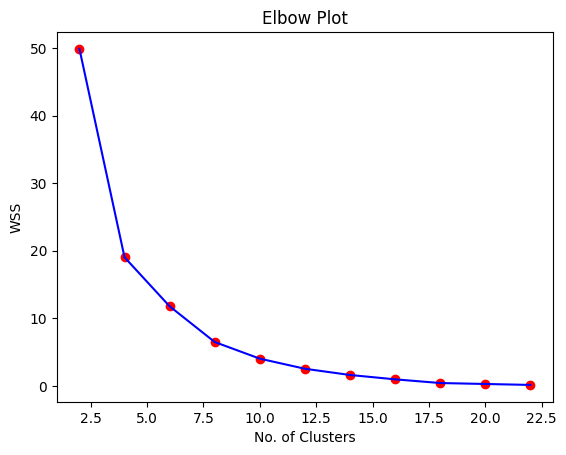

In [89]:
plt.scatter(cluster, scores, c='red')
plt.plot(cluster, scores, c="blue")
plt.title("Elbow Plot")
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.show()

### NOTE : Lower value is better for WSS , but we choose value after which WSS change is minimal
#### After 10 value for no of cluster the results were not changing 

In [78]:
kmeans = KMeans(n_clusters=10,random_state=23)
kmeans.fit(scaled_data)
kmeans.predict(scaled_data)

array([0, 0, 0, 0, 0, 6, 6, 7, 3, 9, 7, 6, 0, 3, 6, 7, 8, 5, 1, 8, 4, 4,
       4, 2, 2], dtype=int32)

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2) 

In [81]:
pca_data = pca.fit_transform(scaled_data)
labels = kmeans.predict(scaled_data)

<Axes: >

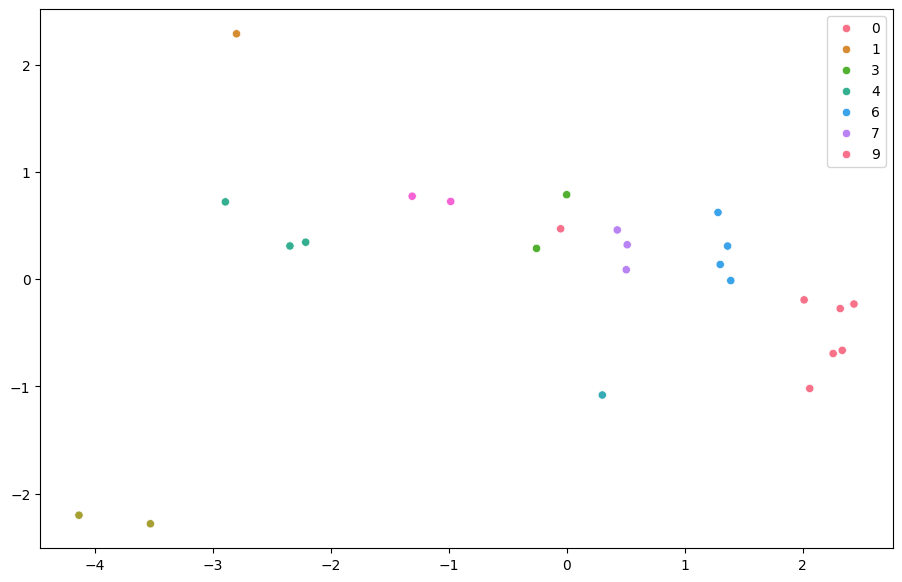

In [86]:
import seaborn as sns 

plt.figure(figsize=(11,7))

sns.scatterplot(x=pca_data[:,0],
            y=pca_data[:,1],
            hue=labels,palette='husl')


#### some points maybe wrongly classified to different / further cluster 